In [460]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [461]:
dataset = pd.read_csv('Breast_cancer_data.csv')

In [462]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [463]:
dataset.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [464]:
X = dataset[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = dataset['diagnosis']

In [465]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [466]:
X.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


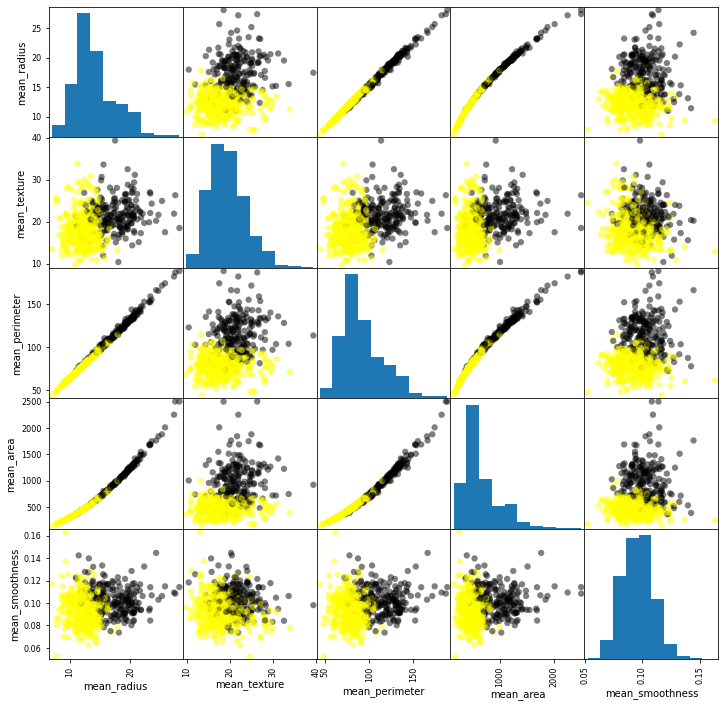

In [467]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X,c=y,marker='o',s=40,figsize=(12,12),cmap = cmap)

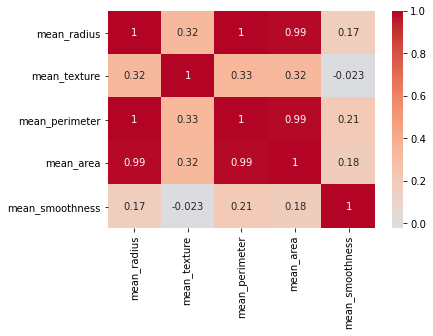

In [468]:
sns.heatmap(X.corr(),annot=True,cmap='coolwarm',center=0)
plt.show()

In [469]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [470]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : np.arange(1,50)}

In [471]:
grid_cv = GridSearchCV(knn,param_grid=parameters)

In [472]:
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [473]:
y_pred = grid_cv.predict(X_test)

In [474]:
print("The accuracy for this processed data is : {} %".format(100 * (accuracy_score(y_test,y_pred))))
print(grid_cv.best_score_)
print(grid_cv.best_params_)

The accuracy for this processed data is : 93.85964912280701 %
0.8835164835164836
{'n_neighbors': 9}


In [475]:
dict_cv = grid_cv.cv_results_

In [476]:
mean_ts = dict_cv['mean_test_score']

In [477]:
print(mean_ts)

[0.84615385 0.83956044 0.87252747 0.84835165 0.87692308 0.86153846
 0.87692308 0.86593407 0.88351648 0.87032967 0.87912088 0.87912088
 0.87692308 0.87252747 0.87472527 0.87472527 0.87912088 0.87912088
 0.87912088 0.87912088 0.87912088 0.88131868 0.87912088 0.87692308
 0.87912088 0.87692308 0.87912088 0.87252747 0.87912088 0.87912088
 0.88131868 0.88131868 0.88131868 0.88131868 0.87912088 0.88131868
 0.88351648 0.88131868 0.88351648 0.87912088 0.87912088 0.87252747
 0.87912088 0.87472527 0.87912088 0.87472527 0.87912088 0.87472527
 0.87472527]


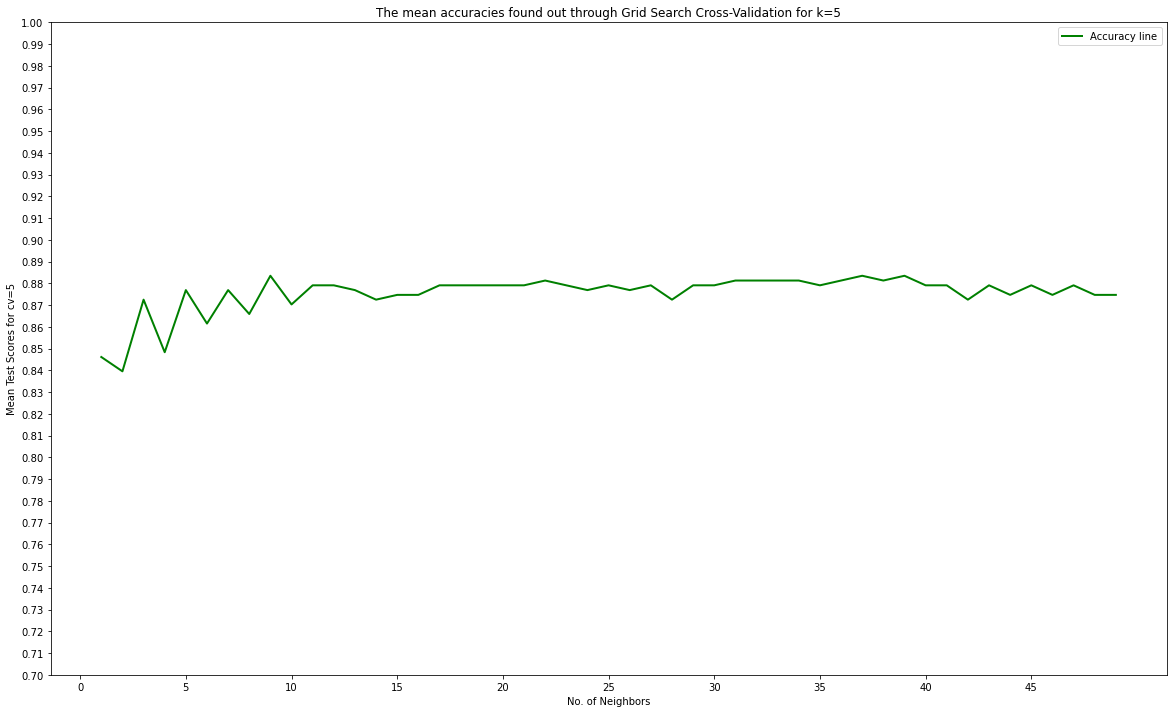

In [478]:
fig = plt.figure(1,figsize=(20,12))
plt.plot(np.arange(1,50),mean_ts,label='Accuracy line',c='g',linewidth=2)
plt.title('The mean accuracies found out through Grid Search Cross-Validation for k=5')
plt.xlabel('No. of Neighbors')
plt.ylabel('Mean Test Scores for cv=5')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0.7,1,0.01))
plt.legend(loc="best")
plt.show()

This is the result found after using PCA AND NORMALIZING the features.

In [479]:
normalize = Normalizer()

In [480]:
pca = PCA(n_components=4)

In [481]:
X_norm = normalize.fit_transform(X)
X_norm = pd.DataFrame(X_norm,columns=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
X_norm

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,0.017835,0.010290,0.121739,0.992349,0.000117
1,0.015432,0.013332,0.099706,0.994808,0.000064
2,0.016268,0.017557,0.107407,0.993927,0.000091
3,0.028947,0.051659,0.196649,0.978684,0.000361
4,0.015557,0.010995,0.103584,0.994438,0.000077
...,...,...,...,...,...
564,0.014508,0.015066,0.095550,0.995205,0.000075
565,0.015872,0.022274,0.103447,0.994259,0.000077
566,0.019179,0.032443,0.125127,0.991425,0.000098
567,0.016179,0.023036,0.110034,0.993529,0.000093


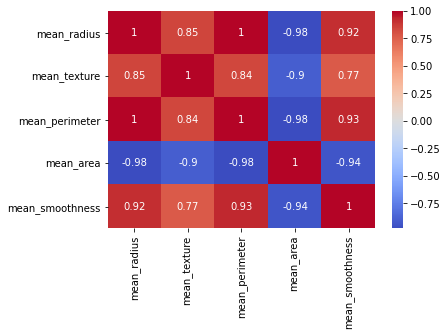

In [482]:
sns.heatmap(X_norm.corr(),annot=True,cmap='coolwarm')

In [483]:
X_final = pca.fit_transform(X_norm)

In [484]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.53179887e-01, 4.59602338e-02, 7.61329621e-04, 9.81213499e-05])

In [485]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=42)

In [486]:
param_grid = {'n_neighbors': np.arange(1,50)}
knn_norm = KNeighborsClassifier()

In [487]:
grid_cv_norm = GridSearchCV(knn_norm,param_grid,cv=5)

In [488]:
grid_cv_norm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [489]:
y_pred = grid_cv_norm.predict(X_test)

In [490]:
print("The accuracy for this processed data is : {} %".format(100 * (accuracy_score(y_test,y_pred))))
print(grid_cv_norm.best_score_)
print(grid_cv_norm.best_params_)

The accuracy for this processed data is : 89.47368421052632 %
0.8857142857142858
{'n_neighbors': 15}


In [491]:
dict_cv_norm = grid_cv_norm.cv_results_

In [492]:
mean_ts = dict_cv_norm['mean_test_score']

In [493]:
print(mean_ts)

[0.82857143 0.7956044  0.85494505 0.84615385 0.86813187 0.86813187
 0.87692308 0.87032967 0.87252747 0.87692308 0.88351648 0.88131868
 0.88131868 0.88351648 0.88571429 0.88351648 0.87912088 0.88131868
 0.87472527 0.88131868 0.88131868 0.88131868 0.87692308 0.87472527
 0.87912088 0.87692308 0.87692308 0.87252747 0.87032967 0.87032967
 0.87252747 0.87252747 0.87472527 0.87472527 0.87692308 0.87252747
 0.87692308 0.87472527 0.87252747 0.87252747 0.87032967 0.87252747
 0.87032967 0.87032967 0.87252747 0.87472527 0.87692308 0.87472527
 0.87472527]


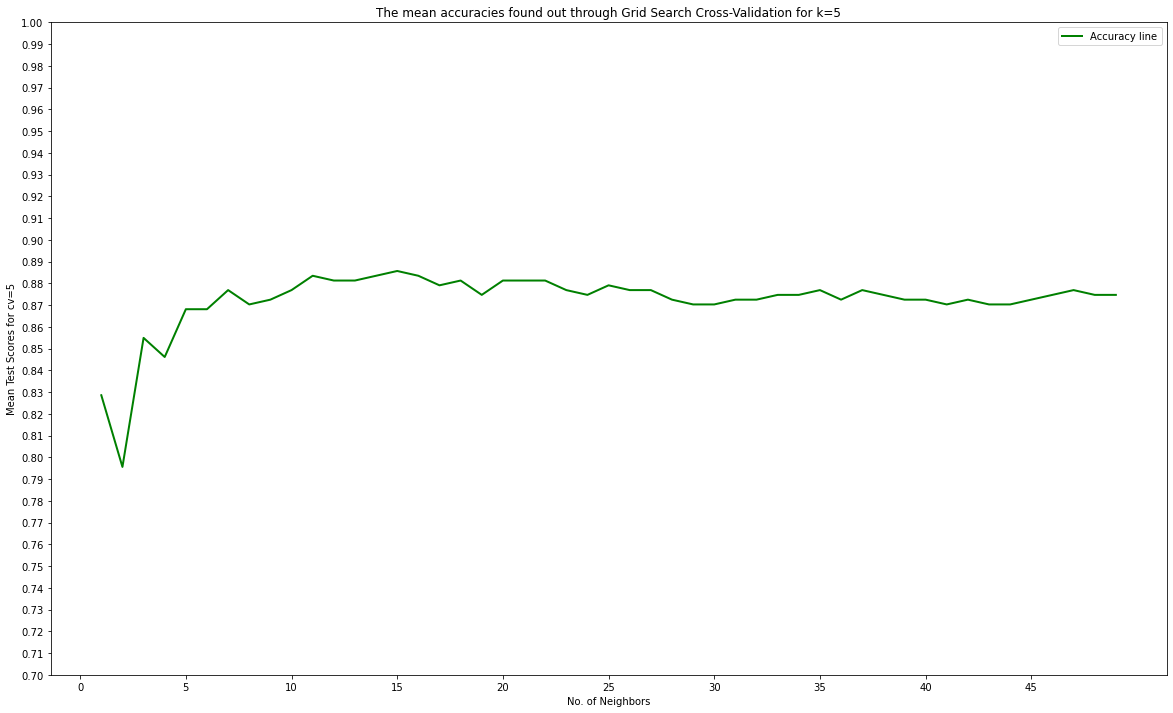

In [494]:
fig = plt.figure(1,figsize=(20,12))
plt.plot(np.arange(1,50),mean_ts,label='Accuracy line',c='g',linewidth=2)
plt.title('The mean accuracies found out through Grid Search Cross-Validation for k=5')
plt.xlabel('No. of Neighbors')
plt.ylabel('Mean Test Scores for cv=5')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0.7,1,0.01))
plt.legend(loc="best")
plt.show()